In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy import linalg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist #Calculates pairwise distance

In [2]:
def equation(df, sigma, distance):
    """Function to calculate equation proposed by Shi and Malik
    Args:
        df (dataframe): dataframe of points to be clustered
    """
    dim = df.shape[0]
    A = np.zeros([dim, dim])
    dist = iter(pdist(df, metric=distance))
#     matrix_dist = dist.pairwise(df.to_numpy())
    for i in range(dim):
        for j in range(i+1, dim):  
            d = np.exp(-((next(dist) ** 2) / (2 * (sigma ** 2))))
            A[i,j] = d
            A[j,i] = d
            A[i,i] = 0
            A[j,j] = 0
    return A


In [3]:
def CSVToDistanceAndGraph(csv) :
    """Function to import file, convert it to data frame, distance matrix and Graph
    Args:
        csv: file to be uploaded 
    """
    # Uploading the file
    file=open(csv)
    df = pd.read_csv(file)
    
    # Original dataset
    print('original dataset:')
    print(df.head())
    
    # Converting to categorized type of DataFrame
    df = convert(df, 2,12)
    df_cluster = df.iloc[:,0:11]
    
    # Converted dataset
    print('converted dataset:')
    print(df_cluster.head())
    
    # Creating an distance matrix
    matrix_dist = equation(df_cluster, 0.3, 'euclidean')
    Graph=nx.from_numpy_matrix(matrix_dist)
    draw_graph(Graph)
    
    # Distance matrix
    print('distance matrix:')
    print(matrix_dist)
    
    return df, df_cluster, matrix_dist, Graph

In [4]:
# Converting string categorical variables into numeric categorical variables

def convert(df, n, k) :
    """Function to convert initial values in numerical values
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): first column to be converted
        n (integer): last column to be converted
    """
    for col in df.iloc[:,n:k].columns:
        df[col] = df[col].astype('category').cat.codes
        
    return df

In [5]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

original dataset:
    Age  Temperature Sex Diarrhea    Fever Coughing ShortnessOfBreath  \
0  67.0        38.11   F  unknown      Yes      Yes           unknown   
1  29.0         0.00   M  unknown  unknown  unknown           unknown   
2  22.0         0.00   F  unknown  unknown  unknown           unknown   
3  20.0        36.56   F  unknown      Yes      Yes           unknown   
4  21.0         0.00   M  unknown  unknown  unknown           unknown   

  SoreThroat NauseaVomitting  Fatigue   Cancer Diagnosis  
0         No         unknown       No  unknown      H1N1  
1    unknown         unknown  unknown  unknown      H1N1  
2    unknown         unknown  unknown  unknown      H1N1  
3         No         unknown      Yes  unknown      H1N1  
4    unknown         unknown  unknown  unknown      H1N1  
converted dataset:
    Age  Temperature  Sex  Diarrhea  Fever  Coughing  ShortnessOfBreath  \
0  67.0        38.11    0         2      1         1                  2   
1  29.0         0.00

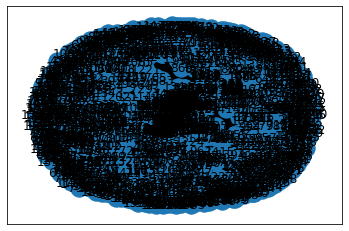

In [6]:
csv="Flu_Classification.csv"
df, df_cluster, matrix_dist, Graph = CSVToDistanceAndGraph(csv)

In [7]:
# Creating Degree Matrix, Laplacian Matrix, printing the eigenvalues and eigenvectors

def bigFucntion(G, matrix_dist) :
    """Function to create degree matrix, (Normalized) Laplacian matrix and find eigenvalues and eigenvectors 
    Args:
        G: Graph
        matrix_dist: distance matrix
    """
    degrees = [val for (node, val) in G.degree()]
    
    # Degree matrix
    D = np.zeros((len(degrees), len(degrees)))
    np.fill_diagonal(D, degrees)
    print('degree matrix:')
    print(D)
    
    # laplacian matrix
    L = D - matrix_dist
    print('laplacian matrix:')
    print(L)
    
    # Normalised laplacian matrix
    D_half = linalg.fractional_matrix_power(D, -0.5)
    LN = np.matmul(np.matmul(D_half, L), D_half)
    print('normalised laplacian matrix:')
    print(LN)
    
    # Eigenvalues and Eigenvectors
    e, v = np.linalg.eig(LN)
    e = e.real
    v = v.real
    
    print('eigenvalues:')
    print(e)
    
    print('eigenvectors:')
    print(v)
    
    return D, L, LN, e, v

In [8]:
DegreeMatrix, LaplacianMatrix, NormalizedLaplacianMatrix, e, v = bigFucntion(Graph, matrix_dist)

degree matrix:
[[ 73.   0.   0. ...   0.   0.   0.]
 [  0. 200.   0. ...   0.   0.   0.]
 [  0.   0. 217. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 421.   0.   0.]
 [  0.   0.   0. ...   0. 430.   0.]
 [  0.   0.   0. ...   0.   0. 436.]]
laplacian matrix:
[[ 7.30000000e+001  0.00000000e+000  0.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  2.00000000e+002 -2.30485663e-121 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000 -2.30485663e-121  2.17000000e+002 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 ...
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  4.21000000e+002
  -3.86592014e-003 -1.92874985e-022]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ... -3.86592014e-003
   4.30000000e+002 -2.23363144e-010]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ... -1.92874985e-022
  -2.23363144e-010  4.36000000e+002]]
normalised laplacian matrix:
[[ 1.00000000e+000  0.00000000e+000  0

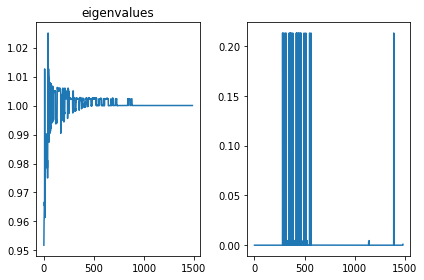

In [9]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < np.amax(e))[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [10]:
# finding optimal number of clusters using Silhouette_score

def findClusters(df):
    """Function to calculate equation proposed by Shi and Malik
    Args:
        df (dataframe): dataframe of points to be clustered
    """
    range_n_clusters = list (range(2,10))
    thisdict = {}
    for n_clusters in range_n_clusters:
        clusterer = KMeans (n_clusters=n_clusters).fit(df)
        preds = clusterer.predict(df)
        centers = clusterer.cluster_centers_
        score = [silhouette_score (df, preds)]   
        thisdict[n_clusters] = [score]
       
    
    maxValue = max(thisdict, key = (lambda k: thisdict[k]))
    return thisdict, maxValue

In [11]:
thisdict, maxValue = findClusters(df_cluster)
print(maxValue)
thisdict

6


{2: [[0.497731987087321]],
 3: [[0.5543765188392608]],
 4: [[0.6022868526283583]],
 5: [[0.605890472308548]],
 6: [[0.6272428554295735]],
 7: [[0.6180585843318745]],
 8: [[0.6040202693275863]],
 9: [[0.58744787317572]]}

In [13]:
U = np.array(v[:, i[0]]).reshape(-1, 1)
print(U)
km = KMeans(init='k-means++', n_clusters=maxValue)
df['clusters'] = km.fit_predict(U)
df

[[ 4.83517911e-15]
 [-3.08324136e-15]
 [ 5.74709427e-15]
 ...
 [ 7.43239475e-09]
 [ 3.50452825e-07]
 [ 8.63187646e-04]]


,Age,Temperature,Sex,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis,clusters
0,67.00,38.11,0,2,1,1,2,0,2,0,1,1,0
1,29.00,0.00,1,2,2,2,2,2,2,2,1,1,0
2,22.00,0.00,0,2,2,2,2,2,2,2,1,1,0
3,20.00,36.56,0,2,1,1,2,0,2,1,1,1,0
4,21.00,0.00,1,2,2,2,2,2,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1.40,0.00,2,2,2,2,2,2,2,2,1,0,0
1481,0.83,0.00,2,2,2,2,2,2,2,2,1,0,0
1482,3.00,0.00,2,2,2,2,2,2,2,2,1,0,0
1483,4.00,0.00,2,2,2,2,2,2,2,2,1,0,0
